In [39]:
#1. Acquire dataset containig housing features(eg. Area, location(mainroad), number of bedrooms) and corresponding price.

In [40]:
#First we will load the dataset for that purpose we import library pandas and numpy 
import pandas as pd 
import numpy as np

In [41]:
#Loading dataset
#in the following dataset in which there is one column name stories this column indicates floor of the house 
df = pd.read_csv("Housing_data.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2.0,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3.0,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2.0,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3.0,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2.0,no,furnished


In [42]:
df.shape

(545, 13)

In [43]:
#Data Preprocessing 
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [44]:
#first we will check for null values 
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            4
hotwaterheating     2
airconditioning     5
parking             1
prefarea            4
furnishingstatus    6
dtype: int64

In [45]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            4
hotwaterheating     2
airconditioning     5
parking             1
prefarea            4
furnishingstatus    6
dtype: int64

In [46]:
#in above using isna() and isnull() function we check for null or na value and we found some null values are there so we will drop those na or null value from our dataset!
data = df.dropna()

In [47]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

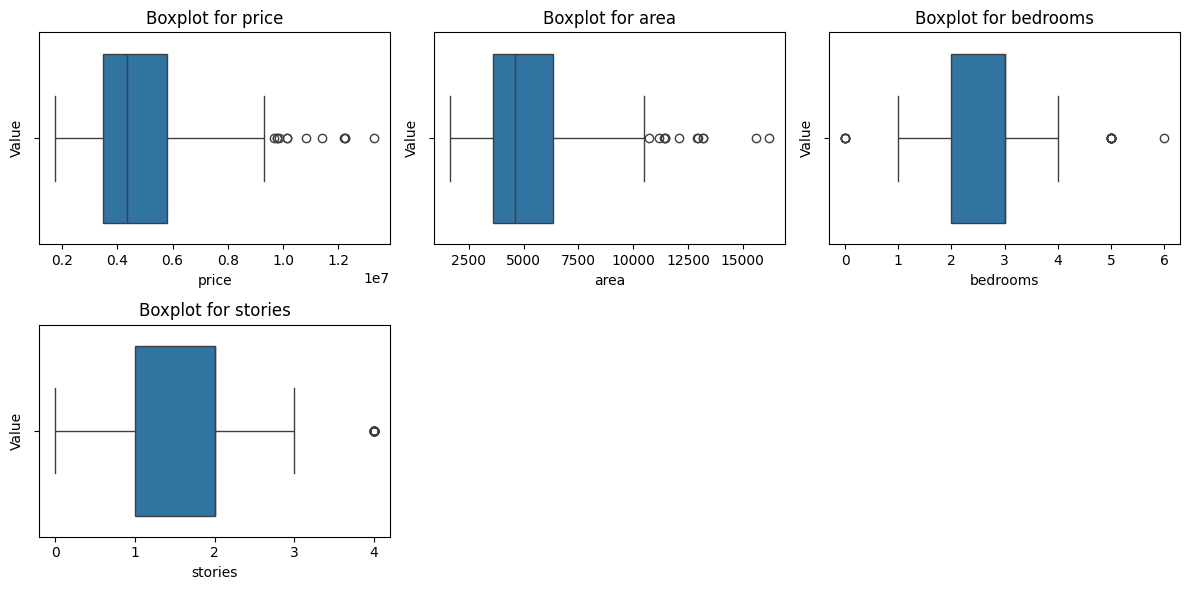

In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
numerical_features = data[['price', 'area', 'bedrooms', 'stories']]  # Replace with your features

plt.figure(figsize=(12, 6))  # Adjust figure size as needed

# Create subplots for each feature
for i, feature in enumerate(numerical_features):
  plt.subplot(2, 3, i+1)  # Create a grid of 2 rows and 3 columns
  sns.boxplot(x = data[feature])  # Use seaborn for boxplots
  plt.xlabel(feature)
  plt.ylabel('Value')
  plt.title(f'Boxplot for {feature}')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [49]:
data= data[(data['price'] >= data['price'].quantile(0.05)) & (data['price'] <= data['price'].quantile(0.95))]
data= data[(data['area'] >= data['area'].quantile(0.05)) & (data['area'] <= data['area'].quantile(0.95))]
data= data[(data['bedrooms'] >= data['bedrooms'].quantile(0.05)) & (data['bedrooms'] <= data['bedrooms'].quantile(0.95))]
data= data[(data['stories'] >= data['stories'].quantile(0.05)) & (data['stories'] <= data['stories'].quantile(0.95))]

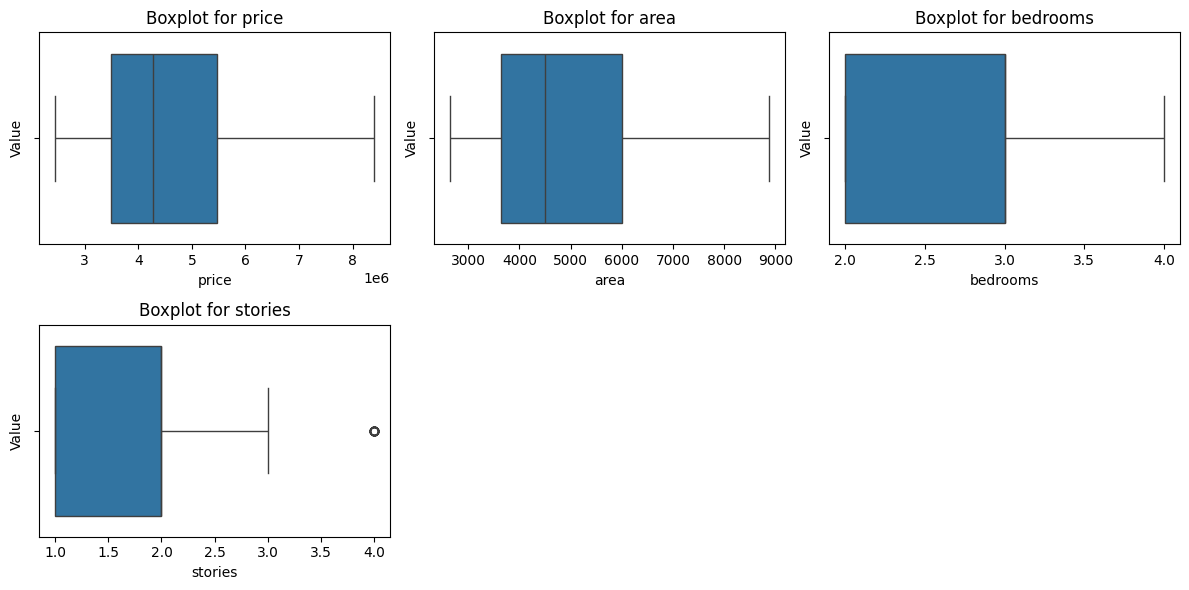

In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
numerical_features = data[['price', 'area', 'bedrooms', 'stories']]  # Replace with your features

plt.figure(figsize=(12, 6))  # Adjust figure size as needed

# Create subplots for each feature
for i, feature in enumerate(numerical_features):
  plt.subplot(2, 3, i+1)  # Create a grid of 2 rows and 3 columns
  sns.boxplot(x = data[feature])  # Use seaborn for boxplots
  plt.xlabel(feature)
  plt.ylabel('Value')
  plt.title(f'Boxplot for {feature}')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [51]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
27,8400000,8875,3,1,1,yes,no,no,no,no,1.0,no,semi-furnished
30,8400000,7475,3,2,4,yes,no,no,no,yes,2.0,no,unfurnished
31,8400000,7000,3,1,4,yes,no,no,no,yes,2.0,no,semi-furnished
32,8295000,4880,4,2,2,yes,no,no,no,yes,1.0,yes,furnished
33,8190000,5960,3,3,2,yes,yes,yes,no,no,1.0,no,unfurnished


In [52]:
#now we will encode the categorical data for model creation using label encoder 
#lable encoding 
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

In [53]:
#lable encoding 
data['mainroad']=le.fit_transform(data['mainroad'])
data['guestroom']=le.fit_transform(data['guestroom'])
data['basement']=le.fit_transform(data['basement'])
data['hotwaterheating']=le.fit_transform(data['hotwaterheating'])
data['airconditioning']=le.fit_transform(data['airconditioning'])
data['prefarea']=le.fit_transform(data['prefarea'])
data['furnishingstatus']=le.fit_transform(data['furnishingstatus'])


In [54]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
27,8400000,8875,3,1,1,1,0,0,0,0,1.0,0,1
30,8400000,7475,3,2,4,1,0,0,0,1,2.0,0,2
31,8400000,7000,3,1,4,1,0,0,0,1,2.0,0,1
32,8295000,4880,4,2,2,1,0,0,0,1,1.0,1,0
33,8190000,5960,3,3,2,1,1,1,0,0,1.0,0,2


In [55]:
#we will now divide data into dependent variable and independent variable 
x= data.drop('price',axis=1)
y= data['price']

In [56]:
x.shape

(410, 12)

In [57]:
y.shape

(410,)

In [58]:
from sklearn.preprocessing import MinMaxScaler
norm=MinMaxScaler()
x=norm.fit_transform(data)
x

array([[1.        , 1.        , 0.5       , ..., 0.33333333, 0.        ,
        0.5       ],
       [1.        , 0.7751004 , 0.5       , ..., 0.66666667, 0.        ,
        1.        ],
       [1.        , 0.69879518, 0.5       , ..., 0.66666667, 0.        ,
        0.5       ],
       ...,
       [0.        , 0.13654618, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.35180723, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.81124498, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2)

In [60]:
#Creation of Model 
#1. Random Forest classifier 
from sklearn.ensemble import RandomForestClassifier 

In [61]:
#intialise the model 
rf=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)

In [62]:
rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [63]:
#test the model
ref_pred = rf.predict(x_test)

In [64]:
ref_pred

array([6020000, 3395000, 4900000, 3087000, 4095000, 3570000, 4473000,
       5425000, 4830000, 3500000, 4200000, 4480000, 2730000, 4620000,
       3500000, 7700000, 2940000, 4277000, 4865000, 3150000, 3885000,
       3220000, 4445000, 3395000, 5600000, 4340000, 2852500, 4235000,
       3640000, 3920000, 5383000, 4473000, 4900000, 5950000, 3360000,
       2660000, 4382000, 3710000, 4060000, 2653000, 3500000, 3150000,
       2590000, 3290000, 3605000, 3360000, 5810000, 4340000, 3290000,
       2660000, 4165000, 5110000, 2450000, 4900000, 4025000, 2660000,
       4305000, 4900000, 4900000, 2660000, 3360000, 4620000, 5110000,
       5110000, 2940000, 3220000, 4620000, 6293000, 3780000, 7420000,
       5810000, 4165000, 2730000, 3500000, 4900000, 3850000, 4130000,
       4893000, 4473000, 4130000, 4270000, 5950000], dtype=int64)

In [65]:
y_test

150    5600000
469    3010000
176    5250000
399    3500000
287    4200000
        ...   
170    5250000
250    4515000
196    4970000
75     6650000
139    5740000
Name: price, Length: 82, dtype: int64

In [66]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error,r2_score
rf_mse = mean_squared_error(y_test, ref_pred)
rf_rmse =root_mean_squared_error(y_test, ref_pred)
rf_r2_score = r2_score(y_test, ref_pred)
rf_mse

800606368902.439

In [67]:
rf_rmse

894766.0973139511

In [68]:
rf_r2_score

0.497932295597206

In [69]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [70]:
lr.fit(x_train, y_train)

LinearRegression()

In [71]:
Lr_pred=lr.predict(x_test)
Lr_pred

array([5600000.        , 3010000.        , 5250000.        ,
       3500000.        , 4200000.        , 3360000.        ,
       4760000.        , 5523000.        , 6860000.        ,
       3640000.        , 4480000.        , 4480000.        ,
       3710000.        , 4613000.        , 3710000.        ,
       6300000.        , 2800000.        , 5530000.        ,
       5866000.        , 3150000.        , 4200000.        ,
       3430000.        , 4543000.        , 5600000.        ,
       6685000.        , 4270000.        , 2870000.        ,
       4200000.        , 3640000.        , 4193000.        ,
       5005000.        , 4550000.        , 7350000.        ,
       6090000.        , 4956000.        , 2940000.        ,
       4130000.        , 3675000.        , 4200000.        ,
       2450000.        , 3885000.        , 3150000.        ,
       2870000.        , 5250000.        , 3745000.        ,
       3290000.        , 6720000.        , 6474999.99999999,
       3360000.        ,

In [72]:
y_test

150    5600000
469    3010000
176    5250000
399    3500000
287    4200000
        ...   
170    5250000
250    4515000
196    4970000
75     6650000
139    5740000
Name: price, Length: 82, dtype: int64

In [73]:
lr_mse = mean_squared_error(y_test, Lr_pred)
lr_rmse =root_mean_squared_error(y_test, Lr_pred)
lr_r2_score =r2_score(y_test, Lr_pred)

lr_mse


5.780648656227592e-18

In [74]:
lr_rmse

2.4042979549605726e-09

In [75]:
lr_r2_score

1.0

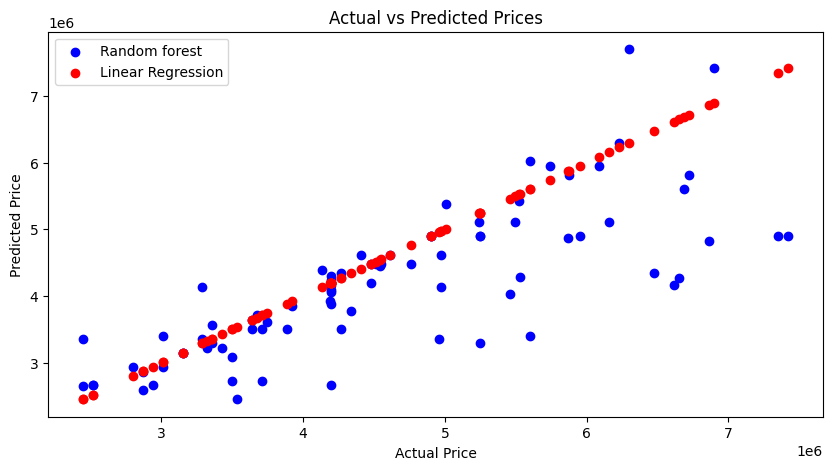

In [76]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.scatter(y_test, ref_pred, color='blue', label='Random forest')
plt.scatter(y_test, Lr_pred, color='red', label='Linear Regression')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()